In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 변경
plt.rcParams['axes.unicode_minus'] = False     # 마이너스부호 깨짐 방지

# Ch02
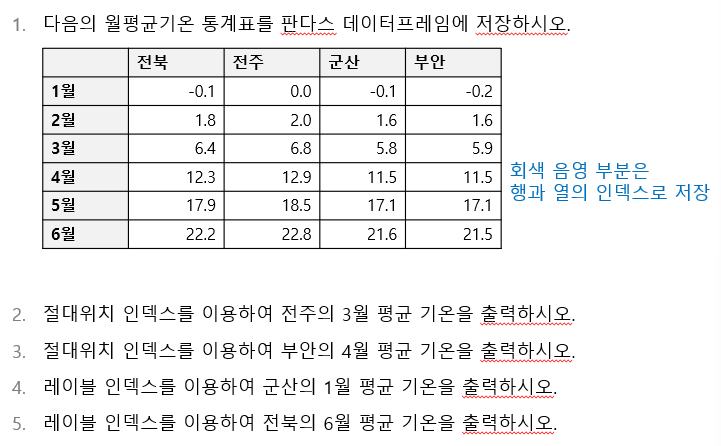

In [3]:
#Q1
lsDataFrame = pd.DataFrame([[-0.1, 0.0, -0.1, -0.2],
                            [1.8, 2.0, 1.6, 1.6],
                            [6.4, 6.8, 5.8, 5.9],
                            [12.3, 12.9, 11.5, 11.5],
                            [17.9, 18.5, 17.1, 17.1],
                            [22.2, 22.8, 21.6, 21.5]],
                             index=['1월', '2월', '3월', '4월', '5월', '6월'],
                            columns=['전북', '전주', '군산', '부안'])
print("Q1 :")
lsDataFrame

Q1 :


,전북,전주,군산,부안
1월,-0.1,0.0,-0.1,-0.2
2월,1.8,2.0,1.6,1.6
3월,6.4,6.8,5.8,5.9
4월,12.3,12.9,11.5,11.5
5월,17.9,18.5,17.1,17.1
6월,22.2,22.8,21.6,21.5


In [4]:
#Q2
print(f"Q2 : 전주 3월 평균기온 = {lsDataFrame.iloc[2,1]}")

Q2 : 전주 3월 평균기온 = 6.8


In [5]:
#Q3
print(f"Q3 : 부안 4월 평균기온 = {lsDataFrame.iloc[3,3]}")

Q3 : 부안 4월 평균기온 = 11.5


In [6]:
#Q4
print(f"Q4 : 군산 1월 평균기온 = {lsDataFrame.loc['1월','군산']}")

Q4 : 군산 1월 평균기온 = -0.1


In [7]:
#Q5
print(f"Q5 : 전북 6월 평균기온 = {lsDataFrame.loc['6월','전북']}")

Q5 : 전북 6월 평균기온 = 22.2


# Ch03
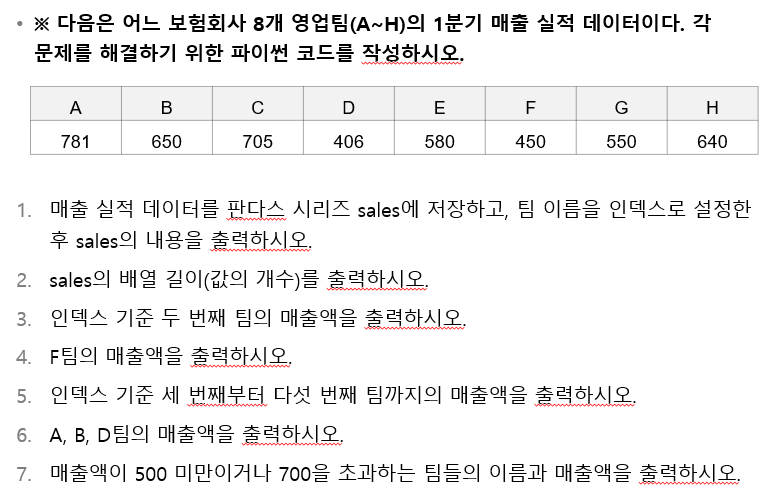
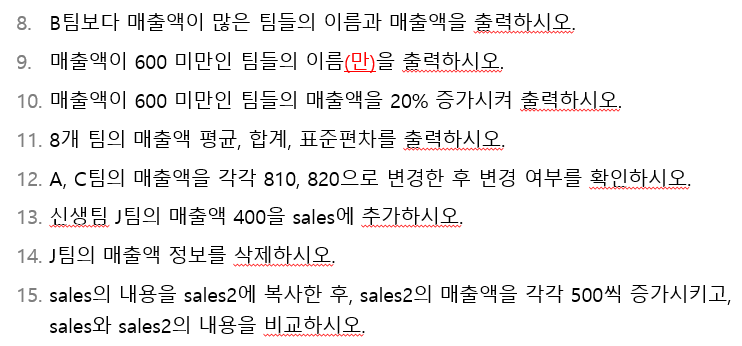

# Ch04

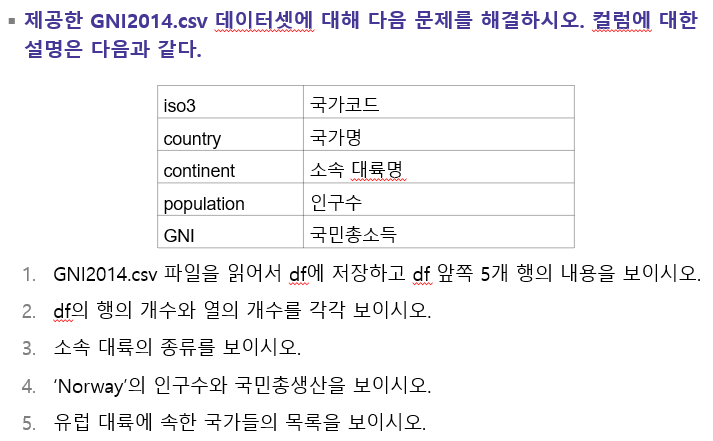
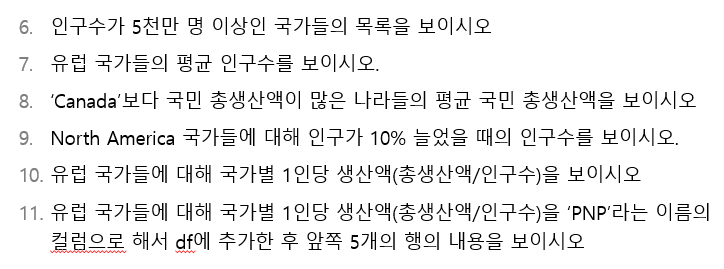

# Ch05-1
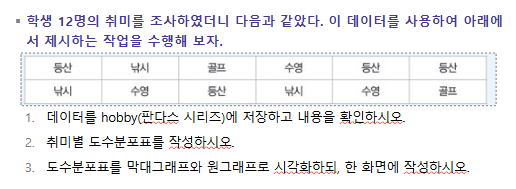

In [8]:
# Q1 데이터를 hobby(판다스 시리즈)에 저장하고 내용을 확인하시오.
hobby = pd.Series(['등산', '낚시', '골프', '수영', '등산', '등산',
                   '낚시', '수영', '등산', '낚시', '수영', '골프'])
hobby

0     등산
1     낚시
2     골프
3     수영
4     등산
5     등산
6     낚시
7     수영
8     등산
9     낚시
10    수영
11    골프
dtype: object

In [9]:
# Q2 취미별 도수분포표를 작성하시오.
hobby_v = hobby.value_counts()
hobby_v

등산    4
낚시    3
수영    3
골프    2
Name: count, dtype: int64

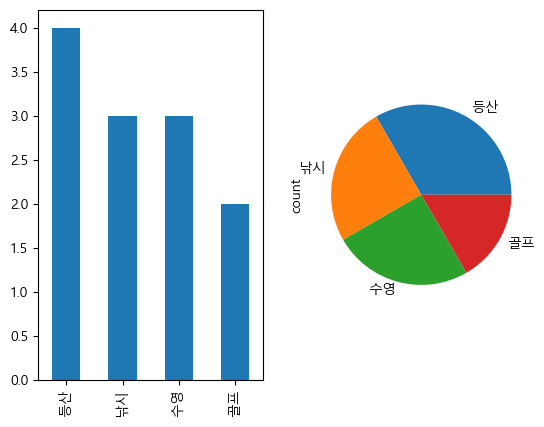

In [10]:
# Q3 도수분포표를 막대그래프와 원그래프로 시각화하되, 한 화면에 작성하시오.
# 화면 분할 정의
fig, axes = plt.subplots(nrows=1, ncols=2)

# 각 분할 영역에 그래프 작성하기
hobby_v.plot.bar(ax=axes[0])
hobby_v.plot.pie(ax=axes[1])

# 분할 그래프 화면에 나타내기 
plt.show()

# Ch05-2
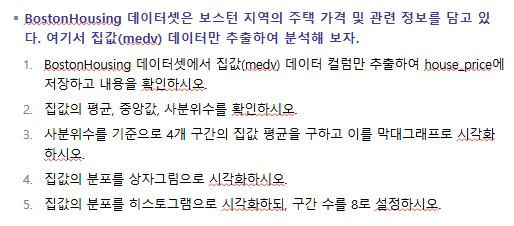

In [11]:
# Q1 BostonHousing 데이터셋에서 집값(medv) 데이터 컬럼만 추출하여 house_price에 저장하고 내용을 확인하시오.

house_price = pd.read_csv('../data/BostonHousing.csv')['medv']
house_price

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [12]:
# Q2 집값의 평균, 중앙값, 사분위수를 확인하시오.

print(house_price.mean())
print(house_price.median())
print(house_price.quantile([0.25,0.5,0.75]).values[:3])

22.532806324110677
21.2
[17.025 21.2   25.   ]


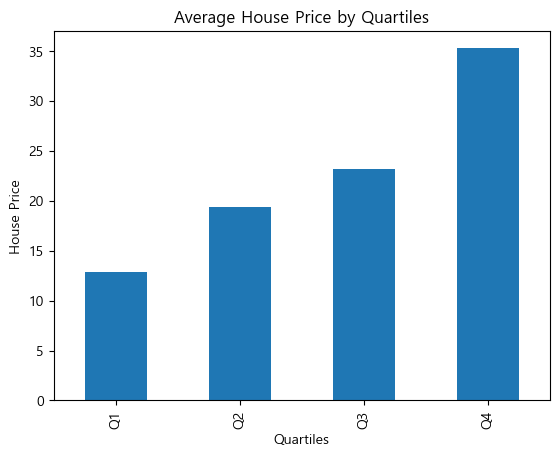

In [13]:
# Q3 사분위수를 기준으로 4개 구간의 집값 평균을 구하고 이를 막대그래프로 시각화하시오.

quan = house_price.quantile([0.25, 0.5, 0.75])
bins = [house_price.min(), quan[0.25], quan[0.5], quan[0.75], house_price.max()]
labels = ['Q1', 'Q2', 'Q3', 'Q4']
grp = pd.cut(house_price, bins=bins, labels=labels)
avg = house_price.groupby(grp, observed=True).mean()
avg.plot.bar()
plt.xlabel('Quartiles')
plt.ylabel('House Price')
plt.title('Average House Price by Quartiles')
plt.show()

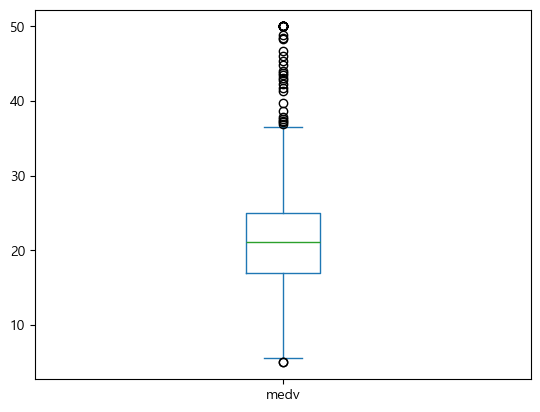

In [14]:
# Q4 집값의 분포를 상자그림으로 시각화하시오.

house_price.plot.box()
plt.show()

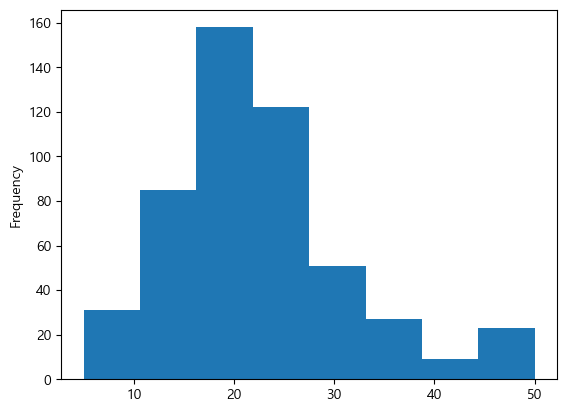

In [15]:
# Q5 집값의 분포를 히스토그램으로 시각화하되, 구간 수를 8로 설정하시오.

house_price.plot.hist(bins=8)
plt.show()

# Ch05-3
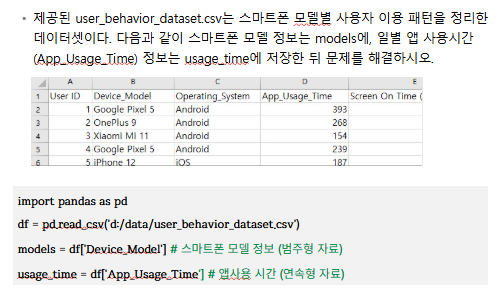
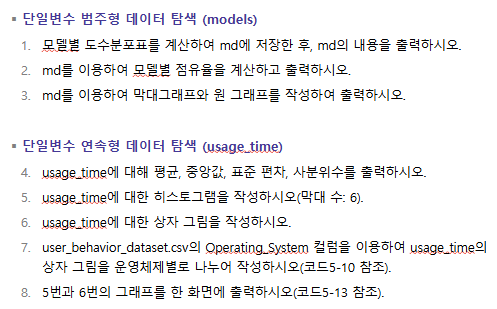

In [16]:
df = pd.read_csv('../data/user_behavior_dataset.csv')
models = df['Device_Model'] # 스마트폰 모델 정보 (범주형 자료)
usage_time = df['App_Usage_Time'] # 앱사용 시간 (연속형 자료)

In [17]:
# Q1 모델별 도수분포표를 계산하여 md에 저장한 후, md의 내용을 출력하시오.
md = models.value_counts()
md

Device_Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [18]:
# Q2 md를 이용하여 모델별 점유율을 계산하고 출력하시오.
md / models.size

Device_Model
Xiaomi Mi 11          0.208571
iPhone 12             0.208571
Google Pixel 5        0.202857
OnePlus 9             0.190000
Samsung Galaxy S21    0.190000
Name: count, dtype: float64

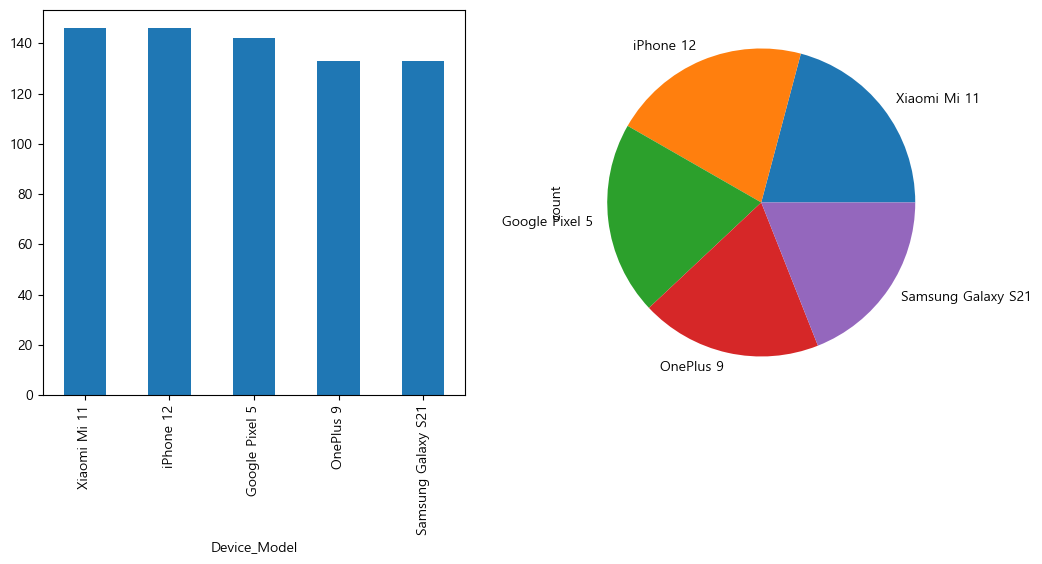

In [19]:
# Q3 md를 이용하여 막대그래프와 원 그래프를 작성하여 출력하시오.​

# 화면 분할 정의
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 각 분할 영역에 그래프 작성하기
md.plot.bar(ax=axes[0])
md.plot.pie(ax=axes[1])

# 분할 그래프 화면에 나타내기 
plt.show()

In [20]:
# Q4 usage_time에 대해 평균, 중앙값, 표준 편차, 사분위수를 출력하시오.

print(f"평균: {usage_time.mean()}")
print(f"중앙값: {usage_time.median()}")
print(f"표준편차: {usage_time.std()}")
print(f"사분위수:\n{usage_time.quantile([0.25, 0.5, 0.75])}")

평균: 271.12857142857143
중앙값: 227.5
표준편차: 177.199484382662
사분위수:
0.25    113.25
0.50    227.50
0.75    434.25
Name: App_Usage_Time, dtype: float64


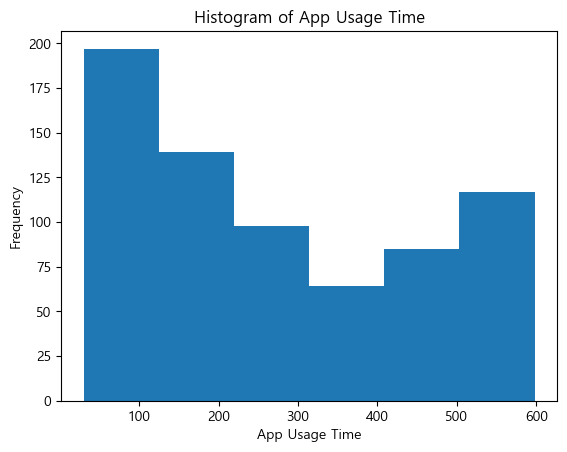

In [21]:
# Q5 usage_time에 대한 히스토그램을 작성하시오(막대 수: 6).

usage_time.plot.hist(bins=6,
    xlabel='App Usage Time',
    ylabel='Frequency',
    title='Histogram of App Usage Time')
plt.show()

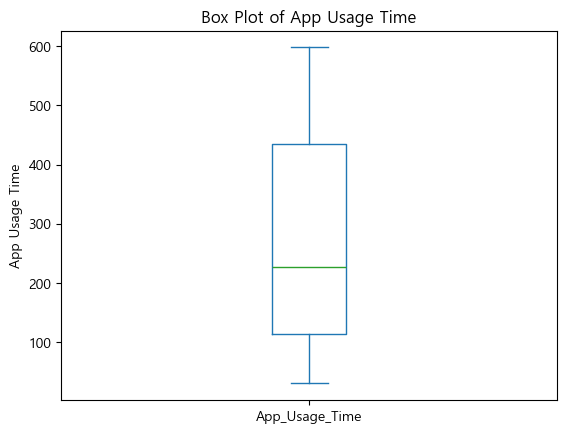

In [22]:
# Q6 usage_time에 대한 상자 그림을 작성하시오.

usage_time.plot.box(ylabel='App Usage Time',
                    title='Box Plot of App Usage Time')
plt.show()

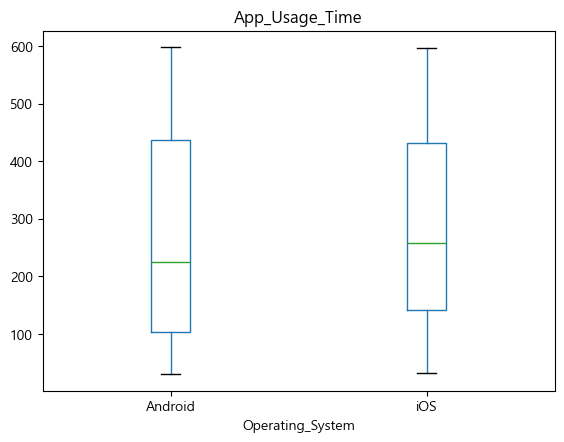

In [23]:
# Q7 user_behavior_dataset.csv의 Operating_System 컬럼을 이용하여
# usage_time의 상자 그림을 운영체제별로 나누어 작성하시오(코드5-10 참조).

df.boxplot(column='App_Usage_Time', by='Operating_System', grid=False)
plt.suptitle('')
plt.show()

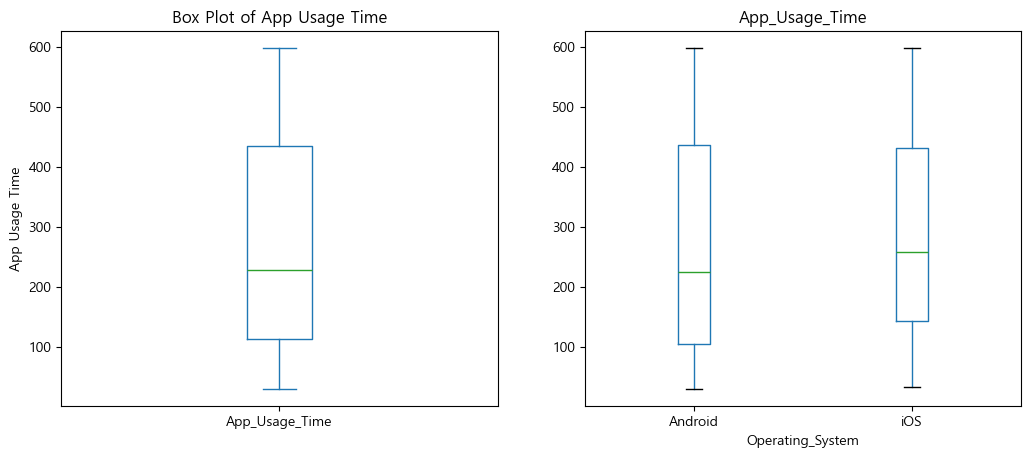

In [24]:
# Q8 5번과 6번의 그래프를 한 화면에 출력하시오(코드5-13 참조).

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
usage_time.plot.box(ylabel='App Usage Time',
                    title='Box Plot of App Usage Time',
                    ax=axes[0])
df.boxplot(column='App_Usage_Time', by='Operating_System', grid=False, ax=axes[1])
plt.suptitle('')
plt.show()